# Notebook of Generating Figures in Paper Main content

## Download auto4dstem package

In [1]:
import sys
#!{sys.executable} -m pip install -i https://test.pypi.org/simple/ Auto4DSTEM==0.7.1
!{sys.executable} -m pip install -U Auto4DSTEM

  Using cached Auto4DSTEM-0.2.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
Using cached Auto4DSTEM-0.2.6-py3-none-any.whl (53 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (50.0 MB)
Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl (755.5 MB)
Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (167.9 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully 

### load packages 

In [46]:
%load_ext autoreload
%autoreload 2
from m3util.viz.layout import layout_subfigures_inches,scalebar,imagemap
from m3util.viz.images import display_image
from m3util.viz.text import labelfigs
from auto4dstem.nn.CC_ST_AE import revise_size_on_affine_gpu,spatial_trans
from auto4dstem.nn.Train_Function import TrainClass
from auto4dstem.Viz.util import mask_class, mask_function,find_nearby_dot_group,custom_formatter
from auto4dstem.Viz.viz import set_format_Auto4D, visualize_simulate_result,\
                                                visual_performance_plot,normalized_strain_matrices,image_with_colorbar,generate_plot_fig3,\
                                                extract_ele_from_dic_fig3,normalized_comparison_fig3,hist_plotter
from m3util.util.IO import download_files_from_txt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as mcolors
from cmcrameri import cm
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches

## Download pretrained data from Zenodo

In [10]:
folder_path = 'Figures_4_notebook'
file_download =  "files_generate_figures_for_notebook.txt"

In [11]:
# check where are you from the root path
download_files_from_txt(file_download,folder_path)

  3%|███▌                                                                                                  | 1/29 [00:00<00:14,  1.88it/s]

File already exists: auto4dstem_logo_trans.png


  7%|███████                                                                                               | 2/29 [00:00<00:12,  2.13it/s]

File already exists: py4DSTEM_logo.png


 10%|██████████▌                                                                                           | 3/29 [00:01<00:11,  2.21it/s]

File already exists: Label_strain_xx.npy


 14%|██████████████                                                                                        | 4/29 [00:01<00:11,  2.25it/s]

File already exists: EMPAD_OG.jpg


 17%|█████████████████▌                                                                                    | 5/29 [00:02<00:11,  2.16it/s]

File already exists: EMPAD_Scaled.jpg


 21%|█████████████████████                                                                                 | 6/29 [00:02<00:10,  2.17it/s]

File already exists: sample_img.npy


 24%|████████████████████████▌                                                                             | 7/29 [00:03<00:09,  2.24it/s]

File already exists: auto4dstem_LOGO.png


 28%|████████████████████████████▏                                                                         | 8/29 [00:03<00:09,  2.31it/s]

File already exists: transformed_sample_of_index_[25820 32170 38520 44870 51220].h5


 31%|███████████████████████████████▋                                                                      | 9/29 [00:04<00:08,  2.31it/s]

File already exists: ABF_WS2WSe2.npy


 34%|██████████████████████████████████▊                                                                  | 10/29 [00:04<00:08,  2.24it/s]

File already exists: WS2WSe2_real_strain_list.h5


 38%|██████████████████████████████████████▎                                                              | 11/29 [00:04<00:08,  2.20it/s]

File already exists: py4dstem_logo_trans.png


 41%|█████████████████████████████████████████▊                                                           | 12/29 [00:05<00:07,  2.17it/s]

File already exists: EMPAD_Rotated.jpg


 45%|█████████████████████████████████████████████▎                                                       | 13/29 [00:05<00:07,  2.21it/s]

File already exists: figure-2-docx.jpg


 48%|████████████████████████████████████████████████▊                                                    | 14/29 [00:06<00:06,  2.15it/s]

File already exists: Label_strain_yy.npy


 52%|████████████████████████████████████████████████████▏                                                | 15/29 [00:06<00:06,  2.23it/s]

File already exists: ADF_WS2WSe2.npy


 55%|███████████████████████████████████████████████████████▋                                             | 16/29 [00:07<00:05,  2.20it/s]

File already exists: [0, 0.25, 0.6].h5


 59%|███████████████████████████████████████████████████████████▏                                         | 17/29 [00:07<00:05,  2.26it/s]

File already exists: WS2WSe2_strain_maginitude_with_py4d.h5


 62%|██████████████████████████████████████████████████████████████▋                                      | 18/29 [00:08<00:04,  2.30it/s]

File already exists: Label_shear_xy.npy


 66%|██████████████████████████████████████████████████████████████████▏                                  | 19/29 [00:08<00:04,  2.33it/s]

File already exists: Label_rotation.npy


 69%|█████████████████████████████████████████████████████████████████████▋                               | 20/29 [00:08<00:03,  2.34it/s]

File already exists: analysis_bg60per_1e5counts__strain.h5


 72%|█████████████████████████████████████████████████████████████████████████▏                           | 21/29 [00:09<00:03,  2.31it/s]

File already exists: analysis_bg25per_1e5counts__strain.h5


 76%|████████████████████████████████████████████████████████████████████████████▌                        | 22/29 [00:09<00:03,  2.32it/s]

File already exists: analysis_bg00per_1e5counts__strain.h5


 79%|████████████████████████████████████████████████████████████████████████████████                     | 23/29 [00:10<00:02,  2.19it/s]

File already exists: 60Per_2_train_process_rotation.npy


 83%|███████████████████████████████████████████████████████████████████████████████████▌                 | 24/29 [00:10<00:02,  2.23it/s]

File already exists: 60Per_2_train_process_scale_shear.npy


 86%|███████████████████████████████████████████████████████████████████████████████████████              | 25/29 [00:11<00:01,  2.28it/s]

File already exists: 25Per_2_train_process_rotation.npy


 90%|██████████████████████████████████████████████████████████████████████████████████████████▌          | 26/29 [00:11<00:01,  2.31it/s]

File already exists: 25Per_2_train_process_scale_shear.npy


 93%|██████████████████████████████████████████████████████████████████████████████████████████████       | 27/29 [00:12<00:00,  2.32it/s]

File already exists: 00Per_2_train_process_rotation.npy


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████▌   | 28/29 [00:12<00:00,  2.34it/s]

File already exists: 00Per_2_train_process_scale_shear.npy


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.26it/s]

File already exists: MAE_list_simulated_4dstem.pickle


In [12]:
# turn the load_data_from_file to be False to directly load the images without downloading the 4dstem data
load_data_from_file = False
if load_data_from_file:
    # set the 4dstem data path if needed
    data_path = os.path.abspath("Simulated_4dstem/Extremely_Noisy_4DSTEM_Strain_Mapping_Using_CC_ST_AE_Simulated/polycrystal_output4D.mat")
    with h5py.File(data_path, 'r') as f:  # Open the file in read mode
        stem4d_data = f['output4D'][0,0]  
    stem4d_data = stem4d_data*1e5/4
    test_data = np.copy(stem4d_data)
else:
    test_data = np.load(f'{folder_path}/sample_img.npy')

# Generate Strained Images for Figure 1

In [13]:
# set correct image size for adding mask
mean_ = np.zeros([256,256])
# generate mask region 
mask_0 = mask_function(mean_,radius=15,center_coordinates=(128,128))

In [14]:
# make image binary
test_data[test_data>=0.3]=1
test_data[test_data<0.3] = 0 
# emphasize center spot 
test_data[mask_0] = test_data[mask_0]*2

In [15]:
# Select color map to represest the color on spots before and after spatial transform
plasma = plt.cm.get_cmap('plasma', 256)
viridis = plt.cm.get_cmap('viridis', 256)
# Get the original plasma colormap
newcolors1 = plasma(np.linspace(0, 1, 256))
newcolors2 = viridis(np.linspace(0, 1, 256))
# make center spot black in each color map
white = np.array([0, 0, 0, 0]) 
black = np.array([0, 0, 0, 1])
# RGBA for white color
newcolors1[0, :] = white  # Set the first row to white (for zeros)
newcolors2[0, :] = white
newcolors1[-1, :] = black  # Set the last row to black (for zeros)
newcolors2[-1, :] = black
# Create a new colormap with the modified color
newcmp1 = mcolors.ListedColormap(newcolors1)
newcmp2 = mcolors.ListedColormap(newcolors2)

## Apply scale on sample image

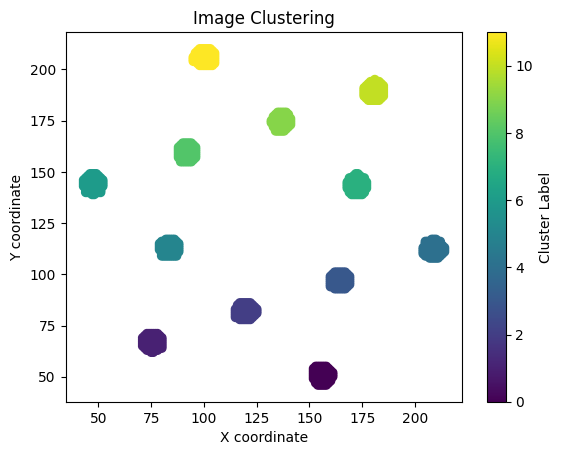

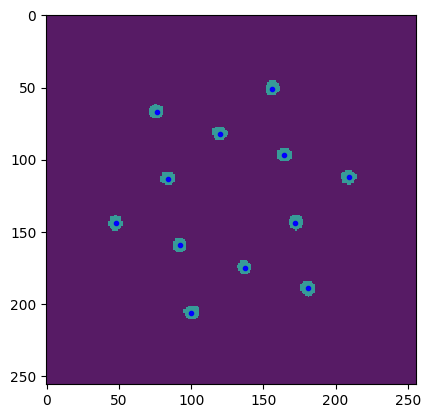

In [16]:
sam_scale = spatial_trans(test_data,matrix = [[0.8,0,0],[0,0.8,0]],mask_0 = mask_0)

# Shear

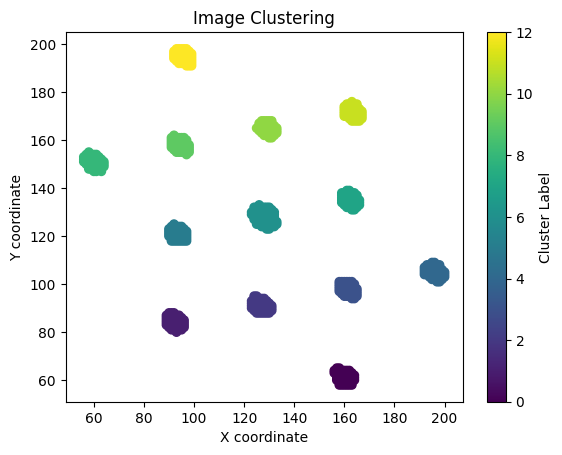

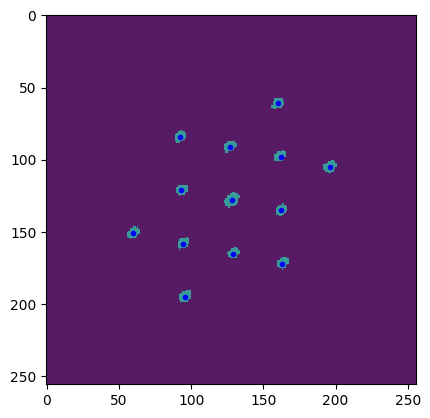

In [17]:
sam_shear = spatial_trans(test_data,matrix = [[1,0.15,0],[0.15,1,0]])

# Rotation

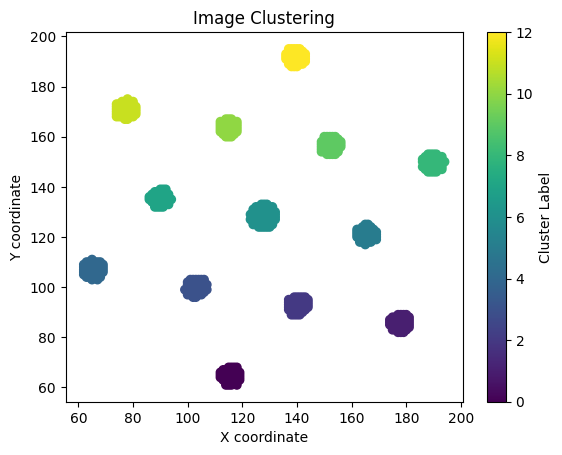

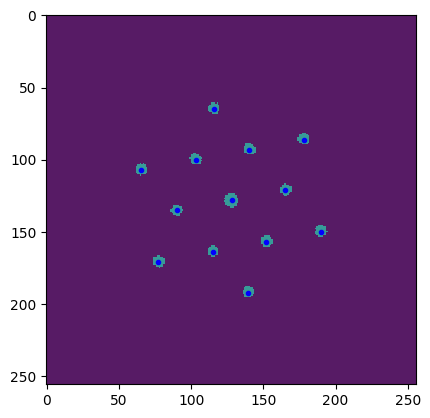

In [18]:
sam_rotation = spatial_trans(test_data,matrix =[[0.866, 0.5 , 0],[-0.5,0.866, 0]])

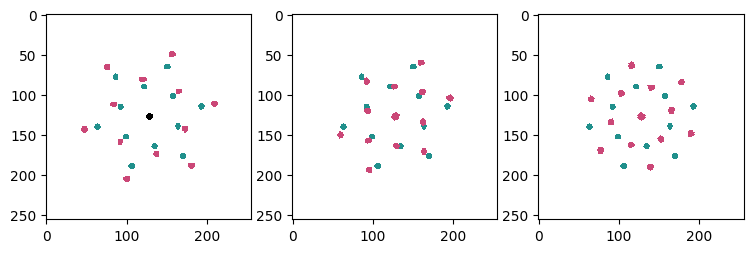

In [19]:
# Visualize the affine transform on image
fig,ax=plt.subplots(1,3,figsize=(9,3))
for i in range(3):
    ax[i].imshow(test_data,clim=[0,2],cmap=newcmp2,interpolation = 'none')
ax[0].imshow(sam_scale,clim=[0,2],cmap=newcmp1,interpolation = 'none')
ax[1].imshow(sam_shear,clim=[0,2],cmap=newcmp1,interpolation = 'none')
ax[2].imshow(sam_rotation,clim=[0,2],cmap=newcmp1,interpolation = 'none')

# Genearte Figure 1 

In [20]:
# initial parameters of the figure
y_max = 2.8558
x_max = 4.3284
width = 1.3805
space_x = (x_max-3*width)/2.0
space_y = (y_max-2*width)

In [21]:
dict = {"4dstem": {"position":(0, width+space_y, width,width),"skip_margin": True},
        "strain_4dstem": {"position":(width+space_x,width+space_y, width,width),"skip_margin": True},
        "rotate_4dstem": {"position":(2*width+2*space_x,width+space_y, width,width),"skip_margin": True},
        "scale": {"position":(0,0, width,width),"skip_margin": True},
        "shear": {"position":(width+space_x,0, width,width),"skip_margin": True},
        "rotation": {"position":(2*width+2*space_x,0, width,width),"skip_margin": True},
        }

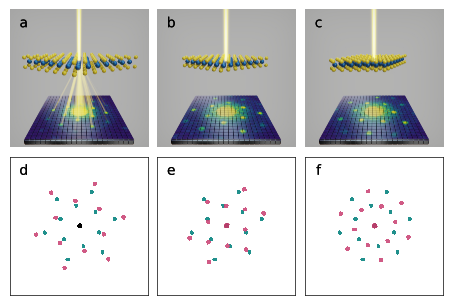

In [22]:
# Generate figure 1
fig, ax = layout_subfigures_inches(size=(4.3284, 2.8558 ), subfigures_dict=dict)
display_image(ax["4dstem"], f"{folder_path}/EMPAD_OG.jpg")
display_image(ax["strain_4dstem"], f"{folder_path}/EMPAD_Scaled.jpg")
display_image(ax["rotate_4dstem"], f"{folder_path}/EMPAD_Rotated.jpg")
ax['scale'].imshow(test_data,clim=[0,2],cmap=newcmp2,interpolation = 'none')
ax['scale'].imshow(sam_scale,clim=[0,2], cmap=newcmp1, alpha=0.9,interpolation = 'none')
ax['shear'].imshow(test_data,clim=[0,2],cmap=newcmp2,interpolation = 'none')
ax['shear'].imshow(sam_shear,clim=[0,2], cmap=newcmp1, alpha=0.9,interpolation = 'none')
ax['rotation'].imshow(test_data,clim=[0,2],cmap=newcmp2,interpolation = 'none')
ax['rotation'].imshow(sam_rotation,clim=[0,2], cmap=newcmp1, alpha=0.9,interpolation = 'none')

for idx, item in enumerate(list(dict.keys())):
    ax[item].tick_params(length=0)
    ax[item].set_xticklabels([])
    ax[item].set_yticklabels([])
    for spine in ax[item].spines.values():
        spine.set_linewidth(0.5)  # Boundary size (thicker)
#    ax[item].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    labelfigs(ax[item], 
            number = idx,
            style = 'b',
            loc ='tl',
            size=10,
            inset_fraction=(0.1, 0.1)
            )
plt.savefig('figure1.png',dpi=600)
plt.savefig('figure1.svg',dpi=600)

# Figure 2

In [27]:
dict = {
        "Model_Structure": {"position":(0, 0, x_max,y_max),"skip_margin": True},
        }

In [28]:
y_max = 2.29
x_max = 5.76

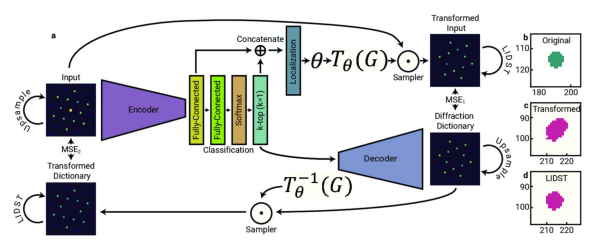

In [29]:
fig, ax = layout_subfigures_inches(size=(x_max, y_max), subfigures_dict=dict)
display_image(ax["Model_Structure"], f"{folder_path}/figure-2-docx.jpg")
plt.savefig('figure2.png',dpi=600)
plt.savefig('figure2.svg',dpi=600)

# Generate Figure 3

In [31]:
# load the noise image and put in list
hf = h5py.File(f'{folder_path}/[0, 0.25, 0.6].h5','r')
with open(f'{folder_path}/MAE_list_simulated_4dstem.pickle', 'rb') as pickle_file:
    mae_list = pickle.load(pickle_file)

In [32]:
# load the strain label of simulated 4dstem
data_list = [f"{folder_path}/Label_strain_xx.npy", f"{folder_path}/Label_strain_yy.npy", 
             f"{folder_path}/Label_shear_xy.npy", f"{folder_path}/Label_rotation.npy"]

In [33]:
# figure parameters
y_max = 6.95
x_max = 5.21
width = 0.9722
width_label_1 = 1.1917
width_label_2 = 1.1932
height_1 = 0.9722
height_2 = 1.0556
height_3 = 0.8333
x_initial_1 = 0.7291
x_end_1 = 4.2574
x_initial_2 = 0.1656
x_end_2 = 4.969
y_end_2 = y_max - 0.1344
y_end_1 = y_max - 3.3199
y_initial = y_max - 6.7993

space_x_1 = (x_end_1 - x_initial_1 - 3*width)/2.0
space_x_2 = (x_end_2 - x_initial_2 - 4*width)/3.0
space_y_1 = (y_end_2 - y_end_1 - height_1*2 - height_2)/2
space_y_2 = (y_end_1 - y_initial - height_2*2 - height_3)/3

In [34]:
# set the position of each figure
dict = {"1": {"position":(x_initial_1, y_end_1+height_1+height_2+2*space_y_1, width,height_1),"skip_margin": True},
        "2": {"position":(x_initial_1+width+space_x_1,y_end_1+height_1+height_2+2*space_y_1, width,height_1),"skip_margin": True},
        "3": {"position":(x_initial_1+2*width+2*space_x_1,y_end_1+height_1+height_2+2*space_y_1, width,height_1),"skip_margin": True},
        
        "4": {"position":(x_initial_2,y_end_1+height_2+space_y_1, width_label_1,height_1),"skip_margin": True},
        "5": {"position":(x_initial_2+width+space_x_2,y_end_1+height_2+space_y_1, width_label_1,height_1),"skip_margin": True},
        "6": {"position":(x_initial_2+2*width+2*space_x_2,y_end_1+height_2+space_y_1, width_label_1,height_1),"skip_margin": True},
        "7": {"position":(x_initial_2+3*width+3*space_x_2,y_end_1+height_2+space_y_1, width_label_2,height_1),"skip_margin": True},
        
        "8": {"position":(x_initial_2,y_end_1, width,height_2),"skip_margin": True},
        "9": {"position":(x_initial_2+width+space_x_2,y_end_1, width,height_2),"skip_margin": True},
        "10": {"position":(x_initial_2+2*width+2*space_x_2,y_end_1, width,height_2),"skip_margin": True},
        "11": {"position":(x_initial_2+3*width+3*space_x_2,y_end_1, width,height_2),"skip_margin": True},
        
        "12": {"position":(x_initial_2,y_initial+2*space_y_2+height_2+height_3, width,height_2),"skip_margin": True},
        "13": {"position":(x_initial_2+width+space_x_2,y_initial+2*space_y_2+height_2+height_3, width,height_2),"skip_margin": True},
        "14": {"position":(x_initial_2+2*width+2*space_x_2,y_initial+2*space_y_2+height_2+height_3, width,height_2),"skip_margin": True},
        "15": {"position":(x_initial_2+3*width+3*space_x_2,y_initial+2*space_y_2+height_2+height_3, width,height_2),"skip_margin": True},
        
        "16": {"position":(x_initial_2,y_initial+space_y_2+height_3, width,height_2),"skip_margin": True},
        "17": {"position":(x_initial_2+width+space_x_2,y_initial+space_y_2+height_3, width,height_2),"skip_margin": True},
        "18": {"position":(x_initial_2+2*width+2*space_x_2,y_initial+space_y_2+height_3, width,height_2),"skip_margin": True},
        "19": {"position":(x_initial_2+3*width+3*space_x_2,y_initial+space_y_2+height_3, width,height_2),"skip_margin": True},
        
        "20": {"position":(x_initial_2,y_initial, width,height_3),"skip_margin": True},
        "21": {"position":(x_initial_2+width+space_x_2,y_initial, width,height_3),"skip_margin": True},
        "22": {"position":(x_initial_2+2*width+2*space_x_2,y_initial, width,height_3),"skip_margin": True},
        "23": {"position":(x_initial_2+3*width+3*space_x_2,y_initial, width,height_3),"skip_margin": True},

        "24": {"position":(0.8151,y_max-3.9217,0.2778,0.2778),"skip_margin": True},
        "25": {"position":(0.8151,y_max-5.2041,0.2778,0.3303),"skip_margin": True},
        "26": {"position":(0.2746,y_max-6.3745,0.25,0.25),"skip_margin": True},
        "27": {"position":(0.8914,y_max-6.7889,0.2222,0.2642),"skip_margin": True},
        }

100%|████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:01<00:00, 39869.01it/s]


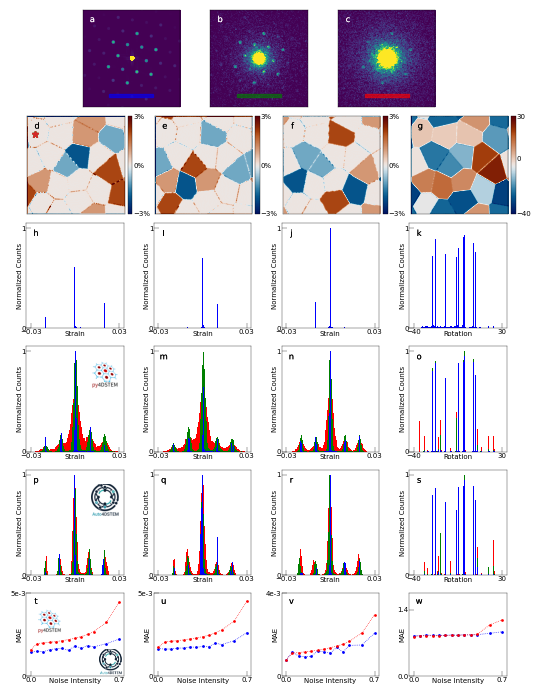

In [35]:
# set save figure format
save_format = 'png'
# set text positions to each figure
xtext_xaxis = 0.5
xtext_yaxis = -0.02
ytext_xaxis = -0.1
ytext_yaxis = 0.5
text_font = 5
star_x = 20
star_y = 45
# set text type of each figure
color_list = ['blue','green','red']
xtext_list = ['Noise-Free', '25% Poisson', '60% Poisson']
# generate the figure
fig, ax = layout_subfigures_inches(size=(x_max, y_max ), subfigures_dict=dict)
# generate image with different noise 
for i, key in enumerate(list(hf.keys())):
    ax[str(i+1)].imshow(hf[key],clim=[0,1])
# generate strain map of the label
for i in range(4,8):
    ax['4'].plot(star_x, star_y, marker='*', markersize=5, linestyle='None')
    tmp = np.load(data_list[i-4])
    if i<7:
        clim = [-0.03,0.03]
        set_ticks = [-0.03,0,0.03]
        percentage = True
    else:
        clim = [-40,30]
        set_ticks = [-40,0,30]
        percentage = False
        label_rotation = np.rad2deg(tmp)
        # calculate mean value of label rotation in reference region 30,60,10,40
        label_ref_rotation = np.mean(label_rotation[30:60,10:40])
        # calculate corresponding rotation based on reference 
        tmp = label_rotation - label_ref_rotation
    image_with_colorbar(ax[str(i)],
                        tmp,
                        cmap = cm.vik,
                        clim = clim,
                        percentage = percentage,
                        set_ticks = set_ticks,
                        pad_tick = 0.4,
                        tick_size = 5)

# genearte histogram of the label  
for i in range(8,12):
    tmp = np.load(data_list[i-8])
    if i<11:
        clim = [-0.03,0.03]
    else:
        clim = [-40,30]
        label_rotation = np.rad2deg(tmp)
        # calculate mean value of label rotation in reference region 30,60,10,40
        label_ref_rotation = np.mean(label_rotation[30:60,10:40])
        # calculate corresponding rotation based on reference 
        tmp = label_rotation - label_ref_rotation
    hist_plotter(ax[str(i)],tmp,clim = clim)
    if i<11:
        ax[str(i)].set_xticks([-0.03,0.03])
    else:
        ax[str(i)].set_xticks([-40,30])
    ax[str(i)].set_yticks([0,1])
# add bar to the figure:
for i in range(3):
    bar = patches.Rectangle((70, 220), width=116, height=10, color=color_list[i], alpha=0.6)
    ax[str(i+1)].add_patch(bar)
    xtext = xtext_list[i]
for i in range(8,24):
    if i<20:
        ytext = 'Normalized Counts'
        xtext = 'Strain'
        if (i+1)%4 ==0:
            xtext = 'Rotation'
        
    else:
        xtext = 'Noise Intensity'
        ytext = 'MAE'
    ax[str(i)].text(ytext_xaxis, ytext_yaxis, ytext, transform=ax[str(i)].transAxes, 
         ha='left', va='center', fontsize=text_font, rotation='vertical')
    ax[str(i)].text(xtext_xaxis, xtext_yaxis, xtext, transform=ax[str(i)].transAxes, 
         ha='center', va='top', fontsize=text_font)
    ax[str(i)].tick_params(axis = 'y', labelsize=5, pad = 0.5, width = 0.25)
    ax[str(i)].tick_params(axis = 'x', labelsize=5, pad = 0.5, width = 0.25)

# generate different bkg noise result
ax_list = []
for i in range(12,20):
    ax_list.append(ax[str(i)])
    if i == 15 or i==19:    
        ax[str(i)].set_xticks([-40,30])
    else:
        ax[str(i)].set_xticks([-0.03,0.03]) 
    ax[str(i)].set_yticks([0,1])
normalized_comparison_fig3(ax_list,folder_path)
# generate plot 
for i in range(20,24):
    if i == 23:
        set_yticks = [0,1.4]
        ylim = [0,1.75]
    elif i==22:
        set_yticks = [0,4e-3]
        ylim = [0,4e-3]
    else:
        set_yticks = [0,5e-3]
        ylim = [0,5e-3]        
    generate_plot_fig3(ax[str(i)],
                      x_list=extract_ele_from_dic_fig3(mae_list,0)[0],
                      auto=extract_ele_from_dic_fig3(mae_list,i-16)[1],
                      py4d=extract_ele_from_dic_fig3(mae_list,i-20)[1],
                      markersize = 1,
                      linewidth = 0.5,
                      set_xticks=[0,0.7],
                      set_yticks = set_yticks,
                      ylim = ylim
                      )
    if i <23:
        ax[str(i)].yaxis.set_major_formatter(FuncFormatter(custom_formatter))
        
display_image(ax["24"], f"{folder_path}/py4DSTEM_logo.png")
display_image(ax["25"], f"{folder_path}/auto4dstem_LOGO.png")
display_image(ax["26"], f"{folder_path}/py4DSTEM_logo.png")
display_image(ax["27"], f"{folder_path}/auto4dstem_LOGO.png")

for idx, item in enumerate(list(dict.keys())):
    style = 'b'
    if idx<3:
        style = 'w'
    if idx<7:
        ax[item].tick_params(length=0)
    if idx>6:
        ax[item].tick_params(direction='in')  
    if idx<7:
        ax[item].set_xticklabels([])
        ax[item].set_yticklabels([])
    for spine in ax[item].spines.values():
        spine.set_linewidth(0.25)  # Boundary size (thicker)
    if idx<23:
        labelfigs(ax[item], 
                number = idx,
                style = style,
                loc ='tl',
                size=6,
                inset_fraction=(0.1, 0.1)
                )
plt.savefig(f'figure3.{save_format}',dpi=600)
# plt.savefig('figure1.svg',dpi=600)

# Generate Figure 4

### Generate ABF and ADF of experimental 4dstem

In [36]:
generate_adf_abf = False
if generate_adf_abf:
    data_path = os.path.abspath("Experimental_4dstem/Extremely_Noisy_4DSTEM_Strain_Mapping_Using_CC_ST_AE_Experimental/data_x256_y256_raw.npy")
    stem4d_data = np.load(data_path)  # Open the file in read mode 
    real_space = np.mean(stem4d_data.reshape(-1,256,256),axis=0)
    diffraction_space = np.mean(stem4d_data.reshape(124,124,-1),axis=2)
    mean_ = np.zeros([124,124])
    mask_0 = mask_function(mean_,radius=10,center_coordinates=(62,62))
    mask_1 = mask_function(mean_,radius=25,center_coordinates=(62,62))
    mask_2 = mask_function(mean_,radius=50,center_coordinates=(62,62))
    mask_3 = ~mask_1*mask_2
    test_diff_bright  = np.copy(diffraction_space)
    test_diff_dark  = np.copy(diffraction_space)
    test_diff_bright[mask_0] = 0
    test_diff_dark[~mask_3]=0
    index_ = np.where(mask_0==1)
    index_1 = np.where(mask_3 == 1)
    white_center = stem4d_data[index_]
    dark_center = stem4d_data[index_1]
    avg_white = np.mean(white_center,axis=0)
    avg_dark = np.mean(dark_center,axis=0)
else:
    avg_white = np.load(f'{folder_path}/ABF_WS2WSe2.npy')
    avg_dark = np.load(f'{folder_path}/ADF_WS2WSe2.npy')

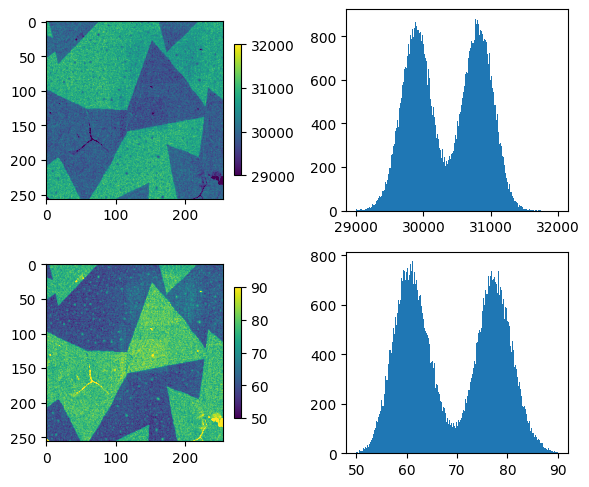

In [37]:
fig,ax = plt.subplots(2,2,figsize=(6,5))
clim1 = [2.90e4,3.2e4]
clim2 = [50,90]

sc1 = ax[0][0].imshow(avg_white,clim = clim1,cmap = 'viridis')
cbar1 = plt.colorbar(sc1, ax=ax[0][0], shrink=0.65)
ax[0][1].hist(avg_white.reshape(-1),200,range = clim1);

sc2 = ax[1][0].imshow(avg_dark,clim = clim2,cmap = 'viridis')
cbar2 = plt.colorbar(sc2, ax=ax[1][0], shrink=0.65)
ax[1][1].hist(avg_dark.reshape(-1),200,range = clim2);
fig.tight_layout()
#plt.savefig('bright_dark_real_space.svg')

## Strain parameters of experimental dataset

In [38]:
y_max = 3.4
x_max = 5.28
width_1 = 1.0417
width_2 = 1.26
height_1 = 1.0417
height_2 = 1.09
x_initial_1 = 0.038
x_end_1 = 5.0178
y_end_1 = y_max - 0.547
y_end_2 = y_max - 0.055
y_initial_1 = y_max - 2.7759
y_initial_2 = y_max - 3.3744

space_x_1 = (x_end_1 - x_initial_1 - 4*width_1)/3.0
space_y_1 = (y_end_1 - y_initial_1 - height_1 - height_2)
space_y_2 = (y_end_2 - y_initial_2 - height_1*3)/2

In [39]:
# Load h5 file of the transformed sample, strain parameters and strain magitude of py4dstem and auto4dstem
data_path = os.path.abspath(f'{folder_path}/transformed_sample_of_index_[25820 32170 38520 44870 51220].h5')
strain_mag_path = os.path.abspath(f'{folder_path}/WS2WSe2_strain_maginitude_with_py4d.h5')
strain_path = os.path.abspath(f'{folder_path}/WS2WSe2_real_strain_list.h5')

In [40]:
# load the data from h5 file
h5 = h5py.File(data_path,'r')
h_strain_mag = h5py.File(strain_mag_path,'r')
h_strain = h5py.File(strain_path,'r')

In [41]:
# set position of the figure
dict = {"1": {"position":(x_initial_1, y_initial_2+2*space_y_2+2*height_1, width_2,height_1),"skip_margin": True},
        "2": {"position":(x_initial_1+width_1+space_x_1,y_initial_2+2*space_y_2+2*height_1, width_2,height_1),"skip_margin": True},
        
        "3": {"position":(x_initial_1,y_initial_2+space_y_2+height_1, width_1,height_1),"skip_margin": True},
        "4": {"position":(x_initial_1+width_1+space_x_1,y_initial_2+space_y_2+height_1, width_1,height_1),"skip_margin": True},
        
        "5": {"position":(x_initial_1,y_initial_2, width_1,height_1),"skip_margin": True},
        "6": {"position":(x_initial_1+width_1+space_x_1,y_initial_2, width_1,height_1),"skip_margin": True},
        
        "7": {"position":(x_initial_1+2*width_1+2*space_x_1,
                          y_initial_1+space_y_1+height_2, width_2,height_1),"skip_margin": True},
        "8": {"position":(x_initial_1+3*width_1+3*space_x_1,
                          y_initial_1+space_y_1+height_2, width_2,height_1),"skip_margin": True},
        
        "9": {"position":(x_initial_1+2*width_1+2*space_x_1,
                          y_initial_1, width_1,height_2),"skip_margin": True},
        "10": {"position":(x_initial_1+3*width_1+3*space_x_1,
                          y_initial_1, width_1,height_2),"skip_margin": True},

        "11": {"position":(1.5546,y_max - 0.5247, 0.2778,0.3277),"skip_margin": True},
        "12": {"position":(2.8507,y_max - 1.0403, 0.2778,0.3277),"skip_margin": True},
        "13": {"position":(4.2064,y_max - 0.9655, 0.2778,0.2778),"skip_margin": True},
        }

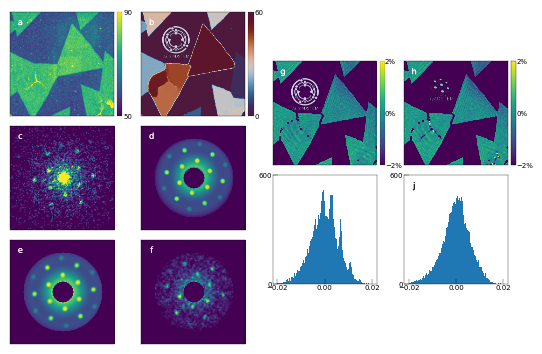

In [42]:
# Generate the figure
fig, ax = layout_subfigures_inches(size=(x_max, y_max ), subfigures_dict=dict)
#imagemap(ax['1'],avg_dark,colorbars=True,clim=[50,90],cbar_number_format = '%2d')
image_with_colorbar(ax['1'],
                    avg_dark,
                    cmap = 'viridis',
                    clim = [50,90],
                    tick_size = 5,
                    set_ticks = [50,90],
                    pad_tick = 1,
                    cbar_linewidth = 0.1
                   )

image_with_colorbar(ax['2'],
                    h_strain['auto4d'][3][:],
                    cmap = cm.vikO,
                    clim = [0,60],
                    tick_size = 5,
                    set_ticks = [0,60],
                    pad_tick = 1,
                    cbar_linewidth = 0.1
                   )

for i in range(3,7):
    ax[str(i)].imshow(h5['44870'][i-3])
    
image_with_colorbar(ax['7'],
                    h_strain_mag['auto4d'][:],
                    cmap = 'viridis',
                    clim = [-0.02,0.02],
                    percentage = True,
                    tick_size = 5,
                    set_ticks = [-0.02,0,0.02],
                    pad_tick = 0,
                    
                    cbar_linewidth = 0.1
                   )
ax['9'].hist(h_strain_mag['auto4d'][:].reshape(-1),200,range = [-0.02,0.02]);

image_with_colorbar(ax['8'],
                    h_strain_mag['py4d'][:],
                    cmap = 'viridis',
                    clim = [-0.02,0.02],
                    percentage = True,
                    tick_size = 5,
                    set_ticks = [-0.02,0,0.02],
                    pad_tick = 0,
                   )
ax['10'].hist(h_strain_mag['py4d'][:].reshape(-1),200,range = [-0.02,0.02]);

display_image(ax["11"], f"{folder_path}/auto4dstem_logo_trans.png")
display_image(ax["12"], f"{folder_path}/auto4dstem_logo_trans.png")
display_image(ax["13"], f"{folder_path}/py4dstem_logo_trans.png")
for idx, item in enumerate(list(dict.keys())):
    style = 'w'
    if idx>7:
        ax[item].tick_params(direction='in')  
        ax[item].set_xticks([-0.02,0,0.02]) 
        ax[item].set_yticks([0,600])
        ax[item].tick_params(axis = 'y', labelsize=5, pad = 0.5, width = 0.25)
        ax[item].tick_params(axis = 'x', labelsize=5, pad = 0.5, width = 0.25)
        style = 'b'
    if idx<8:
        ax[item].tick_params(length=0)
        ax[item].set_xticklabels([])
        ax[item].set_yticklabels([])
    for spine in ax[item].spines.values():
        spine.set_linewidth(0.25)  # Boundary size (thicker
    if idx<10:
        labelfigs(ax[item], 
                number = idx,
                style = style,
                loc ='tl',
                size=6,
                inset_fraction=(0.1, 0.1)
                )
        
plt.savefig(f'figure4.{save_format}',dpi=600)